In [1]:
from sklearn import datasets 
import numpy as np
import pandas as pd 
from IPython.display import display

In [2]:
boston = datasets.load_boston()
boston = pd.DataFrame(boston.data,columns=boston.feature_names).iloc[:5]
boston

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [3]:
display("Series???", isinstance(boston["CRIM"],pd.Series))
display("DataFrame???", isinstance(boston,pd.DataFrame))

'Series???'

True

'DataFrame???'

True

In [4]:
!head titanic_train.csv

In [5]:
df =pd.read_csv("titanic_train.csv",header=0,index_col="PassengerId")
df.index.names = [name.lower() for name in df.index.names]
df.columns = [columns.lower() for columns in df.columns]
df.iloc[:5]

,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
passengerid,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
df["binarized_sex"]=1* (df["sex"]=="female")
df=df.dropna(subset=["age"])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 714 entries, 1 to 891
Data columns (total 12 columns):
survived         714 non-null int64
pclass           714 non-null int64
name             714 non-null object
sex              714 non-null object
age              714 non-null float64
sibsp            714 non-null int64
parch            714 non-null int64
ticket           714 non-null object
fare             714 non-null float64
cabin            185 non-null object
embarked         712 non-null object
binarized_sex    714 non-null int64
dtypes: float64(2), int64(5), object(5)
memory usage: 72.5+ KB


In [7]:
print(df.shape)
df.describe().round(2)

(714, 12)


,survived,pclass,age,sibsp,parch,fare,binarized_sex
count,714.00,714.00,714.00,714.00,714.00,714.00,714.00
mean,0.41,2.24,29.70,0.51,0.43,34.69,0.37
std,0.49,0.84,14.53,0.93,0.85,52.92,0.48
min,0.00,1.00,0.42,0.00,0.00,0.00,0.00
25%,0.00,1.00,20.12,0.00,0.00,8.05,0.00
50%,0.00,2.00,28.00,0.00,0.00,15.74,0.00
75%,1.00,3.00,38.00,1.00,1.00,33.38,1.00
max,1.00,3.00,80.00,5.00,6.00,512.33,1.00


In [8]:
%matplotlib inline
from matplotlib import pyplot as plt
import seaborn as sns
sns.set()

def draw_countplot(df,x,hue,ax0,ax1):
    sns.countplot(x=x,data=df,ax=ax0)
    sns.countplot(x=x,hue=hue,data=df,ax=ax1)

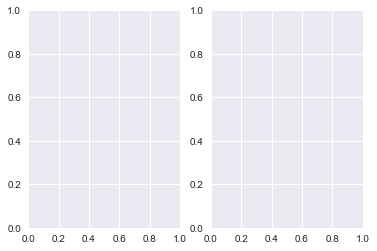

In [9]:
fig,(ax0,ax1)=plt.subplots(1,2)

In [15]:
def cut_df(df,colname,step):
    bins=np.arange(int(df[colname].min()),
                               df[colname].max()+step+1,step)
    return pd.cut(df[colname],bins=bins,labels=bins[1:],include_lowest=True).astype(df[colname].dtype)

In [17]:
columns =[('age',10),('fare',30)]
for colname,step in columns:
    df['%s_cat' % colname] =cut_df(df,colname,step)
df[['age_cat','fare_cat']].iloc[:3]

,age_cat,fare_cat
passengerid,,
1,30.0,30.0
2,40.0,90.0
3,30.0,30.0


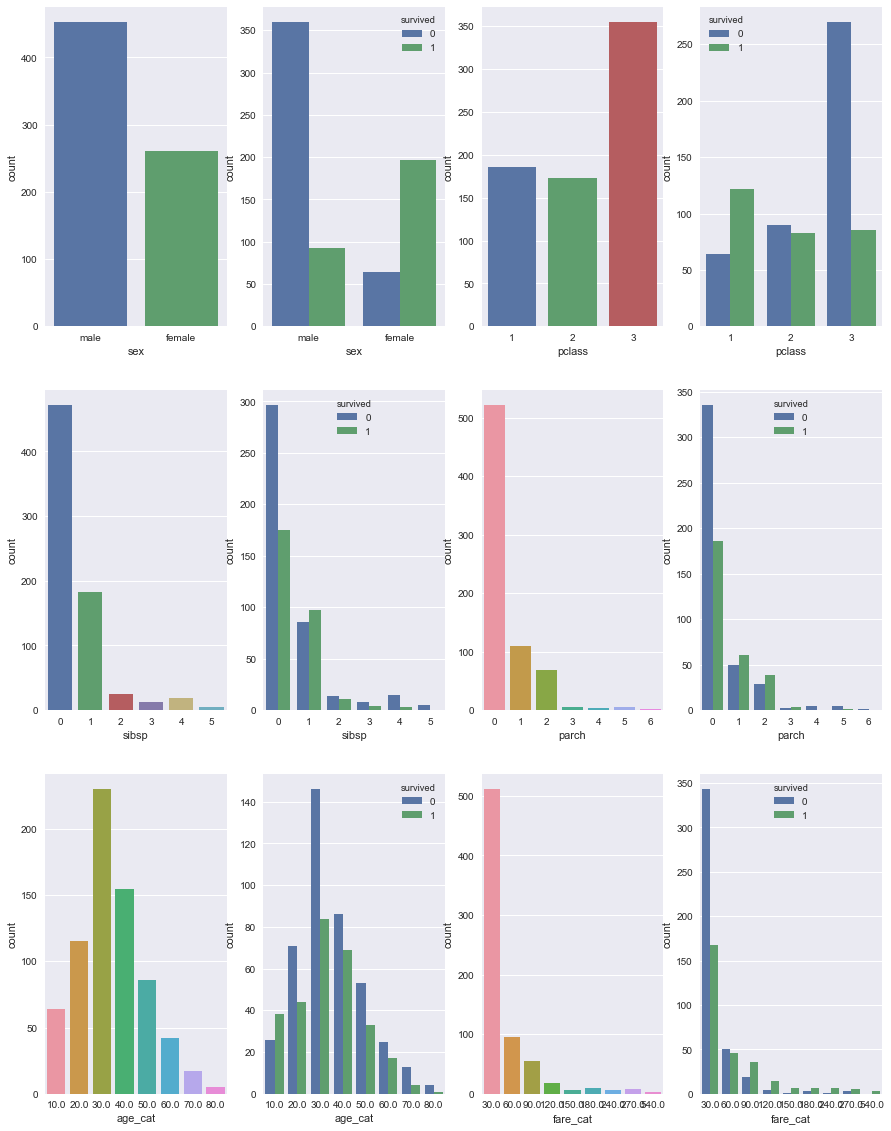

In [22]:
colnames=["sex","pclass","sibsp","parch","age_cat","fare_cat"]
if len(colnames) %2 != 0:
    colnames.append(None)
n_rows = int(len(colnames)/2)
n_cols=4

fig,axes = plt.subplots(n_rows,n_cols,figsize=(5*n_rows,5*n_cols),facecolor='w')
for i,row in enumerate(np.array(colnames).reshape((-1,2))):
    for j, colname in enumerate(row):
        if colname is not None:
            draw_countplot(df,colname,'survived',axes[i][j*2],axes[i][j*2+1])